# Assignment 4

### 1. 复习上课内容以及复现课程代码

在本部分，你需要复习上课内容和课程代码后，自己复现课程代码。

### 2. 回答一下理论题目

#### 1. What does a neuron compute?

回答：一个神经元为计算一个线性函数，并紧跟着一个激活函数（Sigmoid或ReLu）；
激活函数是用来加入非线性因素的，因为线性模型的表达能力不够。例如：tanh, sigmoid

####  2. Why we use non-linear activation funcitons in neural networks?

回答：如果使用线性函数，每一层输出都是上层输入的线性函数，无论神经网络有多少层，输出都是输入的线性组合。加深神经网络的层数就没有什么意义了。线性函数的问题在于不管加深层数到多少，总是存在与之等效的「无隐藏层」的神经网络。

#### 3. What is the 'Logistic Loss' ?

回答： Logistic Loss和Crossing Entropy Loss本质上是一样的。在Logistic Regression我们使用sigmoid函数把矩阵运算的结果落在0和1之间，就可以简单的理解为输出的概率，概率大于50%就为真，这个结果越接近1，则表明结果越真；概率小于50%就为假，这个结果越接近0，则表明结果越假。

通过数学归纳，就能总结出Logistic Loss，Loss=-(y*log(y_hat) + (1-y)log(1-y_hat)) 这个函数可以在y_hat越大的时候接近于1，在y_hat越小的时候接近于0


#### 4. Assume that you are building a binary classifier for detecting if an image containing cats, which activation functions would you recommen using for the output layer ?

A. ReLU    
B. Leaky ReLU    
C. sigmoid    
D. tanh  

回答：C，D

sigmoid：sigmoid函数也叫 Logistic 函数，用于隐层神经元输出，取值范围为(0,1)，它可以将一个实数映射到(0,1)的区间，可以用来做二分类。
在特征相差比较复杂或是相差不是特别大时效果比较好

tanh：tanh在特征相差明显时的效果会很好，在循环过程中会不断扩大特征效果。与 sigmoid 的区别是，tanh 是 0 均值的，因此实际应用中 tanh 会比 sigmoid 更好。


#### 5. Why we don't use zero initialization for all parameters ?

回答：对w初始化为随机值解决（在cnn中，w的随机化，也是为了使得同一层的多个filter，初始w不同，可以学到不同的特征，如果都是0或某个值，由于计算方式相同，可能达不到学习不同特征的目的），w初始化全为0，很可能直接导致模型失效，无法收敛。

#### 6. Can you implement the softmax function using python ? 

In [1]:
def softmax(x):
    """
    Compute the softmax function for each row of the input x.

    Arguments:
    x -- A N dimensional vector or M x N dimensional numpy matrix.

    Return:
    x -- You are allowed to modify x in-place
    """
    orig_shape = x.shape

    if len(x.shape) > 1:
        # Matrix
        exp_minmax = lambda x: np.exp(x - np.max(x))
        denom = lambda x: 1.0 / np.sum(x)
        x = np.apply_along_axis(exp_minmax,1,x)
        denominator = np.apply_along_axis(denom,1,x) 

        if len(denominator.shape) == 1:
            denominator = denominator.reshape((denominator.shape[0],1))

        x = x * denominator
    else:
        # Vector
        x_max = np.max(x)
        x = x - x_max
        numerator = np.exp(x)
        denominator =  1.0 / np.sum(numerator)
        x = numerator.dot(denominator)

    assert x.shape == orig_shape
    return x


In [2]:
import numpy as np
a = np.array([1,2,3,4,5])
print(softmax(a))
np.sum(softmax(a))

[0.01165623 0.03168492 0.08612854 0.23412166 0.63640865]


1.0

### 3.实践题

#### In this practical part, you will build a simple digits recognizer to check if the digit in the image is larger than 5. This assignmnet will guide you step by step to finish your first small project in this course .

#### 1 - Packages  
sklearn is a famous package for machine learning.   
matplotlib is a common package for vasualization.

In [3]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#### 2 - Overvie of the dataset  
    - a training set has m_train images labeled as 0 if the digit < 5 or 1 if the digit >= 5
    - a test set contains m_test images labels as if the digit < 5 or 1 if the digit >= 5
    - eah image if of shape (num_px, num_px ). Thus, each image is square(height=num_px and  width = num_px)

In [4]:
# Loading the data 
digits = datasets.load_digits()

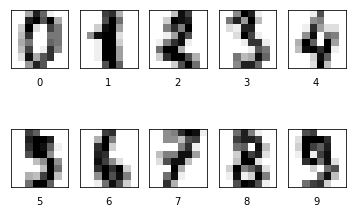

In [5]:
# Vilizating the data
for i in range(1,11):
    plt.subplot(2,5,i)
    plt.imshow(digits.data[i-1].reshape([8,8]),cmap=plt.cm.gray_r)
    plt.text(3,10,str(digits.target[i-1]))
    plt.xticks([])
    plt.yticks([])
plt.show()

In [6]:
# Split the data into training set and test set 
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25)

In [7]:
# reformulate the label. 
# If the digit is smaller than 5, the label is 0.
# If the digit is larger than 5, the label is 1.

y_train[y_train < 5 ] = 0
y_train[y_train >= 5] = 1
y_test[y_test < 5] = 0
y_test[y_test >= 5] = 1

In [8]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1347, 64)
(450, 64)
(1347,)
(450,)


In [9]:
y_train

array([0, 0, 0, ..., 0, 0, 1])

#### 3- Architecture of the neural network

![title](./networks.png)

##### Mathematical expression of the algorithm:

For one example $x^{(i)}$:   
 $$ z^{(i)} = w^T * x^{(i)} +b $$   
 $$ y^{(i)} = a^{(i)} = sigmoid(z^{(i)})$$   
 $$L(a^{(i)},y^{(i)}) = -y^{(i)} log(a^{(i)})-(1-y^{(i)})log(1-a^{(i)})$$

The total cost over all training examples:
$$ J = \frac{1}{m}\sum_{i=1}^{m}L(a^{(i)},y^{(i)}) $$

#### 4 - Building the algorithm

##### 4.1- Activation function    
###### Exercise:
Finish the sigmoid funciton 

In [10]:
import numpy as np


In [11]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """

    s = 1/(1+np.exp(-z))

    return s

##### 4.1-Initializaing parameters
###### Exercise:
Finishe the initialize_parameters function below

In [12]:
# Random innitialize the parameters

def initialize_parameters(dim):
    '''
    Argument: dim -- size of the w vector
    
    Returns:
    w -- initialized vector of shape (dim,1)
    b -- initializaed scalar
    '''
    w = np.zeros((dim, 1))
    b = 0

    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))

    return w, b

#### 4.3-Forward and backward propagation

###### Some mathematical expressions
Forward Propagation:   
. X    
. A = $\sigma(w^T*X+b) = (a^{(1)},a^{(2)},...,a^{(m)}$   
. J = $-\frac{1}{m} \sum_{i=1}^{m}y^{(i)}log(a^{(i)}+(1-y^{(i)})log(1-a^{(i)})$       

Some derivative: 
$$\frac{\partial{J}}{\partial{w}} = \frac{1}{m}X*(A-Y)^T$$   
$$\frac{\partial{J}}{\partial{b}} = \frac{1}{m}\sum_{i=1}^m(a^{(i)}-y^{(i)}) $$

###### Exercise:
Finish the function below:

In [13]:
def propagate(w,b,X,Y):
    '''
    Implement the cost function and its gradient for the propagation
    
    Arguments:
    w - weights
    b - bias
    X - data
    Y - ground truth
    '''
    m = X.shape[1]
    # FORWARD PROPAGATION (FROM X TO COST)
    #A = sigmoid(np.dot(X.T,w)+b)

    A = sigmoid(np.dot(w.T,X) + b )                           # compute activation
    cost = -(np.sum(Y*np.log(A)+(1-Y)*np.log(1-A)))/m       # compute cost

    # BACKWARD PROPAGATION (TO FIND GRAD)

    dw = 1/m*np.dot(X,(A-Y).T)
    db = 1/m*np.sum(A-Y)

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())

    grads = {"dw": dw,
             "db": db}

    return grads, cost


##### 4.4 -Optimization

###### Exercise:
Minimizing the cost function using gradient descent.   
$$\theta = \theta - \alpha*d\theta$$ where $\alpha$ is the learning rate.

In [14]:
def optimise(w, b, X, Y, num_iterations, learning_rate, print_cost=False):
    '''
    This function optimize w and b by running a gradient descen algorithm
    
    Arguments:
    w - weights
    b - bias
    X - data
    Y - ground truth
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params - dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    '''
    costs = []
    #进行迭代：
    for i in range(num_iterations):
        # 用propagate计算出每次迭代后的cost和梯度：
        grads, cost = propagate(w,b,X,Y)
        dw = grads["dw"]
        db = grads["db"]
        
        # 用上面得到的梯度来更新参数：
        w = w - learning_rate*dw
        b = b - learning_rate*db
        
        # 每100次迭代，保存一个cost看看：
        if i % 100 == 0:
            costs.append(cost)
        
        # 这个可以不在意，我们可以每5000次把cost打印出来看看，从而随时掌握模型的进展：
        if print_cost and i % 5000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    #迭代完毕，将最终的各个参数放进字典，并返回：
    params = {"w": w,
              "b": b}
    grads = {"dw": dw,
             "db": db}
    return params, grads, costs


###### Exercise
The previous function will output the learned w and b. We are able to use w and b to predict the labels for a dataset X. Implement the predict() function.    
Two steps to finish this task:   
1. Calculate $\hat{Y} = A = \sigma(w^T*X+b)$   
2. Convert the entries of a into 0 (if activation <= 0.5) or 1 (if activation > 0.5), stores the predictions in a vector Y_prediction. If you wish, you can use an if/else statement in a for loop (though there is also a way to vectorize this).

In [15]:
def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights
    b -- bias 
    X -- data 
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))

    A = sigmoid(np.dot(w.T,X)+b)
    for  i in range(m):
        if A[0,i]>0.5:
            Y_prediction[0,i] = 1
        else:
            Y_prediction[0,i] = 0

    assert(Y_prediction.shape == (1, m))

    return Y_prediction.T


##### 5- Merge all functions into a model

Congratulations !! You have finished all the necessary components for constructing a model. Now, Let's take the challenge to merge all the implemented function into one model.

In [16]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """
    Builds the logistic regression model by calling the function you've implemented previously

    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations

    Returns:
    d -- dictionary containing information about the model.
    """

    # initialize parameters with zeros (≈ 1 line of code)
    w, b = initialize_parameters(X_train.shape[0])
    parameters, grads, costs = optimise(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)

    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]

    # Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    #print(Y_prediction_train)
    #print(Y_train.T)
    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train.T)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test.T)) * 100))


    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test,
         "Y_prediction_train" : Y_prediction_train,
         "w" : w,
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}

    return d

### 4.选做题

Congratulations on building your first logistic regression model. It is your time to analyze it further.

##### 4.1 Observe the effect of learning rate on the leraning process.   
Hits: plot the learning curve with different learning rate

In [17]:
# Split the data into training set and test set 
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25)

# reformulate the label. 
# If the digit is smaller than 5, the label is 0.
# If the digit is larger than 5, the label is 1.
y_train[y_train < 5 ] = 0
y_train[y_train >= 5] = 1
y_test[y_test < 5] = 0
y_test[y_test >= 5] = 1

print ("X_train shape: " + str(X_train.shape))
print ("y_train shape: " + str(y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("y_test shape: " + str(y_test.shape))

X_train shape: (1347, 64)
y_train shape: (1347,)
X_test shape: (450, 64)
y_test shape: (450,)


In [18]:
X_train = (X_train.T)/255
X_test = (X_test.T)/255
y_train = y_train.reshape(-1,1).T
y_test = y_test.reshape(-1,1).T

print ("X_train shape: " + str(X_train.shape))
print ("y_train shape: " + str(y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("y_test shape: " + str(y_test.shape))

X_train shape: (64, 1347)
y_train shape: (1, 1347)
X_test shape: (64, 450)
y_test shape: (1, 450)


In [19]:
d = model(X_train, y_train, X_test, y_test, num_iterations = 50000, learning_rate = 0.5, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 5000: 0.516020
Cost after iteration 10000: 0.444353
Cost after iteration 15000: 0.405640
Cost after iteration 20000: 0.381050
Cost after iteration 25000: 0.363808
Cost after iteration 30000: 0.350902
Cost after iteration 35000: 0.340786
Cost after iteration 40000: 0.332586
Cost after iteration 45000: 0.325767
train accuracy: 88.34446919079436 %
test accuracy: 88.44444444444444 %


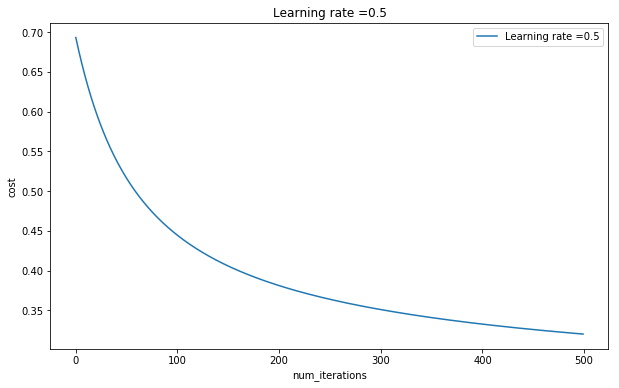

In [20]:
plt.figure(figsize=(10,6))
costs = np.squeeze(d['costs'])
plt.plot(costs,label="Learning rate =" + str(d["learning_rate"]))
plt.ylabel('cost')
plt.xlabel('num_iterations')
plt.legend()
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

In [21]:
learning_rates = [2, 0.8, 0.3, 0.2, 0.1 ,0.05]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(X_train, y_train, X_test, y_test, num_iterations = 100000, learning_rate = i, print_cost = False)
    print ("-" *50)

learning rate is: 2
train accuracy: 90.2746844840386 %
test accuracy: 90.22222222222223 %
--------------------------------------------------
learning rate is: 0.8
train accuracy: 89.82925018559763 %
test accuracy: 90.44444444444444 %
--------------------------------------------------
learning rate is: 0.3
train accuracy: 88.8641425389755 %
test accuracy: 88.66666666666667 %
--------------------------------------------------
learning rate is: 0.2
train accuracy: 88.12175204157387 %
test accuracy: 88.22222222222223 %
--------------------------------------------------
learning rate is: 0.1
train accuracy: 86.93392724573125 %
test accuracy: 88.22222222222223 %
--------------------------------------------------
learning rate is: 0.05
train accuracy: 86.26577579806978 %
test accuracy: 87.55555555555556 %
--------------------------------------------------


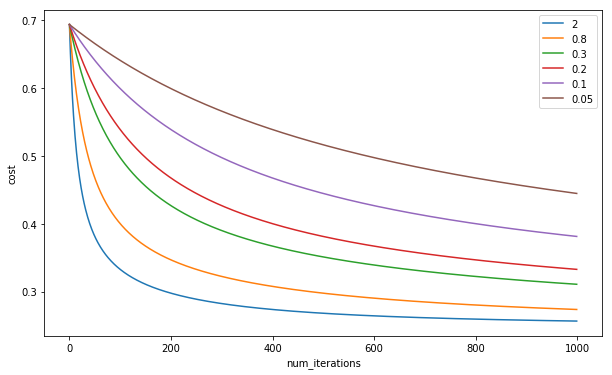

In [22]:
plt.figure(figsize=(10,6))
for i in learning_rates:    
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))
plt.ylabel('cost')
plt.xlabel('num_iterations')
plt.legend(loc='upper right')
plt.show()

##### 4.2 Observe the effect of iteration_num on the test accuracy.

In [23]:
num_iterations = [1000,10000,50000,100000]
models = {}
for i in num_iterations:
    print ("num_iterations is: " + str(i))
    models[str(i)] = model(X_train, y_train, X_test, y_test, num_iterations = i, learning_rate = 0.5, print_cost = False)
    print ("-" *50)

num_iterations is: 1000
train accuracy: 84.6325167037862 %
test accuracy: 84.66666666666667 %
--------------------------------------------------
num_iterations is: 10000
train accuracy: 86.26577579806978 %
test accuracy: 87.55555555555556 %
--------------------------------------------------
num_iterations is: 50000
train accuracy: 88.34446919079436 %
test accuracy: 88.44444444444444 %
--------------------------------------------------
num_iterations is: 100000
train accuracy: 89.23533778767631 %
test accuracy: 89.77777777777777 %
--------------------------------------------------


# Challenge ! ! !

The original data have images labeled 0,1,2,3,4,5,6,7,8,9. In our logistic model, we only detect if the digit in the image is larger or smaller than 5. Now, Let's go for a more challenging problem. Try to use softmax function to build a model to recognize which digit (0,1,2,3,4,5,6,7,8,9) is in the image.

# Congratulations ! You have completed assigment 4. 